In [1]:
import pandas as pd

In [39]:
import os
import pandas as pd

# Full path to your file
file_path = r"C:\Users\Dell\Documents\melb_data(1).csv"
# Check if the file exists
if os.path.exists(file_path):
    df= pd.read_csv(file_path)

In [41]:
total_values=len(df)
print (total_values)

7597


In [51]:
missing_values=(df.isna().sum())
print(missing_values)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     3381
YearBuilt        2752
CouncilArea         1
Lattitude           1
Longtitude          1
Regionname          1
Propertycount       1
dtype: int64


In [57]:
missing_values=((df.isna().sum()/total_values)*100)
print (missing_values,"%")

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.000000
Landsize          0.000000
BuildingArea     44.504410
YearBuilt        36.224826
CouncilArea       0.013163
Lattitude         0.013163
Longtitude        0.013163
Regionname        0.013163
Propertycount     0.013163
dtype: float64 %


In [67]:
columns_to_drop = missing_values[missing_values > 20].index
df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned)

          Suburb           Address  Rooms Type    Price Method   SellerG  \
0     Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1     Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2     Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3     Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4     Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...          ...               ...    ...  ...      ...    ...       ...   
7592   Brunswick   217 Victoria St      3    h  1210000      S  Woodards   
7593   Brunswick   4/287 Albion St      1    h   412000      S    Nelson   
7594   Brunswick   2/199 Barkly St      1    u   528000      S    Nelson   
7595   Brunswick      10 Bennie St      3    h  1115000      S     Caine   
7596   Brunswick  373 Brunswick Rd      3    h  1300000     VB    Nelson   

           Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0     3/12/20

In [95]:
numerical_columns=df_cleaned.select_dtypes(include=['number']).columns

In [97]:
median_values = df_cleaned[numerical_columns].median()

In [99]:
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(median_values)

In [101]:
print (df_cleaned)

          Suburb           Address  Rooms Type    Price Method   SellerG  \
0     Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1     Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2     Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3     Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4     Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...          ...               ...    ...  ...      ...    ...       ...   
7592   Brunswick   217 Victoria St      3    h  1210000      S  Woodards   
7593   Brunswick   4/287 Albion St      1    h   412000      S    Nelson   
7594   Brunswick   2/199 Barkly St      1    u   528000      S    Nelson   
7595   Brunswick      10 Bennie St      3    h  1115000      S     Caine   
7596   Brunswick  373 Brunswick Rd      3    h  1300000     VB    Nelson   

           Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0     3/12/20

In [103]:
print (df_cleaned.isna().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      1
Lattitude        0
Longtitude       0
Regionname       1
Propertycount    0
dtype: int64


In [115]:
categorical_columns=df_cleaned.select_dtypes(include=['object']).columns
mode_values = df_cleaned[categorical_columns].mode().iloc[0]
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(mode_values)
print(df_cleaned)

          Suburb           Address  Rooms Type    Price Method   SellerG  \
0     Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1     Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2     Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3     Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4     Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...          ...               ...    ...  ...      ...    ...       ...   
7592   Brunswick   217 Victoria St      3    h  1210000      S  Woodards   
7593   Brunswick   4/287 Albion St      1    h   412000      S    Nelson   
7594   Brunswick   2/199 Barkly St      1    u   528000      S    Nelson   
7595   Brunswick      10 Bennie St      3    h  1115000      S     Caine   
7596   Brunswick  373 Brunswick Rd      3    h  1300000     VB    Nelson   

           Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0     3/12/20

In [117]:
richmond_houses = df[(df["Suburb"] == "Richmond") & (df["Price"] > 1000000)]
print(richmond_houses.head())


        Suburb          Address  Rooms Type    Price Method        SellerG  \
5257  Richmond       81 Erin St      3    h  1260000      S         Biggin   
5258  Richmond  52 Lyndhurst St      3    t  1236000      S         Jellis   
5263  Richmond        7 Bank St      3    h  1600000      S  hockingstuart   
5264  Richmond      29 Bowen St      3    h  2180000     PI           Blue   
5266  Richmond      131 Lord St      4    h  3335000      S         Jellis   

           Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
5257   3/9/2016       2.6      3121  ...         1    0       203   
5258   3/9/2016       2.6      3121  ...         2    1       675   
5263  3/12/2016       2.6      3121  ...         2    1       115   
5264  3/12/2016       2.6      3121  ...         2    2       345   
5266  3/12/2016       2.6      3121  ...         2    2       319   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
5257          81.0     1900.0        Yarra  -37.

In [121]:
df_filtered = df.loc[df["Landsize"] > 500, ["Price", "Suburb", "BuildingArea"]]
print(df_filtered)

        Price         Suburb  BuildingArea
20    1330000     Abbotsford         135.0
22    1090000     Abbotsford          27.0
45     720000   Airport West           NaN
46     785000   Airport West         127.0
47     725000   Airport West         186.0
...       ...            ...           ...
7584  1270000  Brighton East           NaN
7585  1400000  Brighton East           NaN
7586  1640000  Brighton East           NaN
7588  1900000  Brighton East         271.0
7590  1652000      Brunswick         196.8

[2923 rows x 3 columns]


In [123]:
df_sorted = df.sort_values(by="Price", ascending=False)
print(df_sorted.head(5))


           Suburb           Address  Rooms Type    Price Method   SellerG  \
3616          Kew       15 Barry St      6    h  6500000      S    Jellis   
6372       Toorak      17 Albany Rd      3    h  6250000      S       Kay   
7554     Brighton     161 Church St      5    h  5800000     PI   Castran   
5631  South Yarra       18 Avoca St      4    h  5700000      S   Castran   
251      Armadale  367 Dandenong Rd      6    h  5525000      S  Marshall   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
3616  13/08/2016       5.6      3101  ...         6    3      1334   
6372  15/10/2016       4.6      3142  ...         3    2       564   
7554    8/4/2017      11.2      3186  ...         4    4      1276   
5631  12/11/2016       3.3      3141  ...         2    0       292   
251   17/09/2016       6.3      3143  ...         3    4      1491   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
3616         365.0     1890.0   Boroondara  -37.

In [127]:
df["Price_per_Room"] = df["Price"] / df["Rooms"]
print(df)

          Suburb           Address  Rooms Type    Price Method   SellerG  \
0     Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1     Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2     Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3     Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4     Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...          ...               ...    ...  ...      ...    ...       ...   
7592   Brunswick   217 Victoria St      3    h  1210000      S  Woodards   
7593   Brunswick   4/287 Albion St      1    h   412000      S    Nelson   
7594   Brunswick   2/199 Barkly St      1    u   528000      S    Nelson   
7595   Brunswick      10 Bennie St      3    h  1115000      S     Caine   
7596   Brunswick  373 Brunswick Rd      3    h  1300000     VB    Nelson   

           Date  Distance  Postcode  ...  Car  Landsize  BuildingArea  \
0     3/12/201

In [137]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
invalid_dates = df[df['Date'].isna()]
print(df)

          Suburb           Address  Rooms Type    Price Method   SellerG  \
0     Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1     Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2     Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3     Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4     Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...          ...               ...    ...  ...      ...    ...       ...   
7592   Brunswick   217 Victoria St      3    h  1210000      S  Woodards   
7593   Brunswick   4/287 Albion St      1    h   412000      S    Nelson   
7594   Brunswick   2/199 Barkly St      1    u   528000      S    Nelson   
7595   Brunswick      10 Bennie St      3    h  1115000      S     Caine   
7596   Brunswick  373 Brunswick Rd      3    h  1300000     VB    Nelson   

           Date  Distance  Postcode  ...  Car  Landsize  BuildingArea  \
0    2016-03-1

In [141]:
df["Year_Sold"] = df["Date"].dt.year
print(df)

          Suburb           Address  Rooms Type    Price Method   SellerG  \
0     Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1     Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2     Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3     Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4     Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...          ...               ...    ...  ...      ...    ...       ...   
7592   Brunswick   217 Victoria St      3    h  1210000      S  Woodards   
7593   Brunswick   4/287 Albion St      1    h   412000      S    Nelson   
7594   Brunswick   2/199 Barkly St      1    u   528000      S    Nelson   
7595   Brunswick      10 Bennie St      3    h  1115000      S     Caine   
7596   Brunswick  373 Brunswick Rd      3    h  1300000     VB    Nelson   

           Date  Distance  Postcode  ...  Landsize  BuildingArea  YearBuilt  \
0    201

In [143]:
suburb_avg_price = df.groupby("Suburb")["Price"].mean()
print(suburb_avg_price)


Suburb
Abbotsford            1.077237e+06
Aberfeldie            1.235581e+06
Airport West          7.123625e+05
Albert Park           1.903274e+06
Albion                5.728333e+05
                          ...     
Williamstown          1.287449e+06
Williamstown North    7.348500e+05
Windsor               9.464886e+05
Yallambie             7.703824e+05
Yarraville            9.610279e+05
Name: Price, Length: 142, dtype: float64


In [145]:
properties_per_suburb = df.groupby("Suburb")["Price"].count()
print(properties_per_suburb)


Suburb
Abbotsford             38
Aberfeldie             31
Airport West           40
Albert Park            53
Albion                 24
                     ... 
Williamstown           68
Williamstown North     10
Windsor                44
Yallambie              17
Yarraville            102
Name: Price, Length: 142, dtype: int64


In [147]:
most_expensive_suburb = suburb_avg_price.idxmax()
print("Most expensive suburb:", most_expensive_suburb)


Most expensive suburb: Canterbury


In [149]:
median_price = df["Price"].median()
df["Category"] = df["Price"].apply(lambda x: "Expensive" if x > median_price else "Affordable")


<Axes: xlabel='Suburb'>

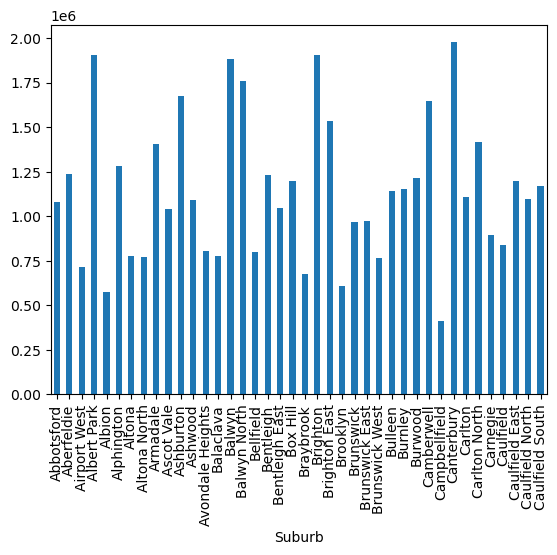

In [161]:
suburb_avg_price.head(40).plot(kind="bar")

In [165]:
df_cleaned.to_csv('cleaned_data.csv', index=False)
df.to_csv('after_interpretation.csv',index=False)

In [167]:
df_cleaned.to_excel('cleaned_data.xlsx',index=False)